<a href="https://colab.research.google.com/github/rfdyning6/rfdyning6.github.io/blob/main/coba_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install pip --upgrade
!pip install category_encoders

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 82 kB 367 kB/s             


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 88)
pd.set_option("display.max_rows", 88)

In [4]:
#New Update Data Set from BRI
ds_df=pd.read_csv('https://decko048.github.io/dataset/data_sup.csv') 
dp_df=pd.read_csv('https://decko048.github.io/dataset/data_produk.csv')
su_df=pd.read_csv('https://decko048.github.io/dataset/std_unwind.csv')
sr_df=pd.read_csv('https://decko048.github.io/dataset/std_rewind.csv')

print('Data SUP Shape :', ds_df.shape)
print('Data Produk Shape :', dp_df.shape)
print('Standard Unwind Shape :', su_df.shape)
print('Standard Rewind Shape :', sr_df.shape)
ds_df.head(15)

Data SUP Shape : (865, 3)
Data Produk Shape : (808, 6)
Standard Unwind Shape : (5, 6)
Standard Rewind Shape : (5, 6)


,NoJI,Mesin,Tanggal SUP
0,7460 0C,CERUTI.1 ...,4/30/2021
1,5743 1C,CERUTI.2 ...,5/2/2021
2,7430 0A,CERUTI.5 ...,5/4/2021
3,7468 1B,CERUTI.2 ...,5/4/2021
4,5360A 2F,CERUTI.1 ...,5/4/2021
5,1145A 7F,CERUTI.1 ...,5/5/2021
6,6368 1C,CERUTI.3 ...,5/5/2021
7,5293 2F,CERUTI.2 ...,5/5/2021
8,6367 1C,CERUTI.3 ...,5/6/2021
9,4990 10P,CERUTI.1 ...,5/6/2021


In [5]:
# Change columns name it's contain space
ds_df.rename(columns={'CERUTI.1':'CERUTI_1','CERUTI.2':'CERUTI_2',
                      'CERUTI.3':'CERUTI_3','CERUTI.5':'CERUTI_5'}, inplace=True)

In [6]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NoJI         865 non-null    object
 1   Mesin        865 non-null    object
 2   Tanggal SUP  865 non-null    object
dtypes: object(3)
memory usage: 20.4+ KB


In [49]:
ds_df = ds_df.fillna(0)
ds_df.head(15)

,NoJI,Mesin,Tanggal SUP
0,7460 0C,CERUTI.1 ...,4/30/2021
1,5743 1C,CERUTI.2 ...,5/2/2021
2,7430 0A,CERUTI.5 ...,5/4/2021
3,7468 1B,CERUTI.2 ...,5/4/2021
4,5360A 2F,CERUTI.1 ...,5/4/2021
5,1145A 7F,CERUTI.1 ...,5/5/2021
6,6368 1C,CERUTI.3 ...,5/5/2021
7,5293 2F,CERUTI.2 ...,5/5/2021
8,6367 1C,CERUTI.3 ...,5/6/2021
9,4990 10P,CERUTI.1 ...,5/6/2021


In [8]:
cleanup_nums ={"Mesin":{"CERUTI.1":1,"CERUTI.2":2,"CERUTI.3":3, "CERUTI.5":5}}

In [9]:
fn_df = ds_df.replace(cleanup_nums)
fn_df = fn_df.fillna(0)
fn_df.head(15)

,NoJI,Mesin,Tanggal SUP
0,7460 0C,CERUTI.1 ...,4/30/2021
1,5743 1C,CERUTI.2 ...,5/2/2021
2,7430 0A,CERUTI.5 ...,5/4/2021
3,7468 1B,CERUTI.2 ...,5/4/2021
4,5360A 2F,CERUTI.1 ...,5/4/2021
5,1145A 7F,CERUTI.1 ...,5/5/2021
6,6368 1C,CERUTI.3 ...,5/5/2021
7,5293 2F,CERUTI.2 ...,5/5/2021
8,6367 1C,CERUTI.3 ...,5/6/2021
9,4990 10P,CERUTI.1 ...,5/6/2021


In [10]:
fn_df = ds_df.replace(cleanup_nums).astype('int64')
fn_df = fn_df.fillna(0)
fn_df.head(15)

ValueError: ignored

In [11]:
fn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NoJI         865 non-null    object
 1   Mesin        865 non-null    object
 2   Tanggal SUP  865 non-null    object
dtypes: object(3)
memory usage: 20.4+ KB


In [12]:
ob_df=ds_df.select_dtypes(include=['object']).copy()
ob_df = ob_df.fillna(0)
ob_df.head(15)

,NoJI,Mesin,Tanggal SUP
0,7460 0C,CERUTI.1 ...,4/30/2021
1,5743 1C,CERUTI.2 ...,5/2/2021
2,7430 0A,CERUTI.5 ...,5/4/2021
3,7468 1B,CERUTI.2 ...,5/4/2021
4,5360A 2F,CERUTI.1 ...,5/4/2021
5,1145A 7F,CERUTI.1 ...,5/5/2021
6,6368 1C,CERUTI.3 ...,5/5/2021
7,5293 2F,CERUTI.2 ...,5/5/2021
8,6367 1C,CERUTI.3 ...,5/6/2021
9,4990 10P,CERUTI.1 ...,5/6/2021


In [13]:
ob_df=ob_df.replace(cleanup_nums)
ob_df.head(15)

,NoJI,Mesin,Tanggal SUP
0,7460 0C,CERUTI.1 ...,4/30/2021
1,5743 1C,CERUTI.2 ...,5/2/2021
2,7430 0A,CERUTI.5 ...,5/4/2021
3,7468 1B,CERUTI.2 ...,5/4/2021
4,5360A 2F,CERUTI.1 ...,5/4/2021
5,1145A 7F,CERUTI.1 ...,5/5/2021
6,6368 1C,CERUTI.3 ...,5/5/2021
7,5293 2F,CERUTI.2 ...,5/5/2021
8,6367 1C,CERUTI.3 ...,5/6/2021
9,4990 10P,CERUTI.1 ...,5/6/2021


In [14]:
from io import StringIO
col = ['NoJI','Mesin','Tanggal SUP']
cat_df = fn_df[col]
cat_df = cat_df[pd.notnull(fn_df['Mesin'])]
cat_df.columns = ['NoJI','Mesin','Tanggal SUP']

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
cat_df.groupby(['Mesin']).Tanggal_SUP.count().plot.bar(ylim=0)
plt.show()

AttributeError: ignored

<Figure size 720x360 with 0 Axes>

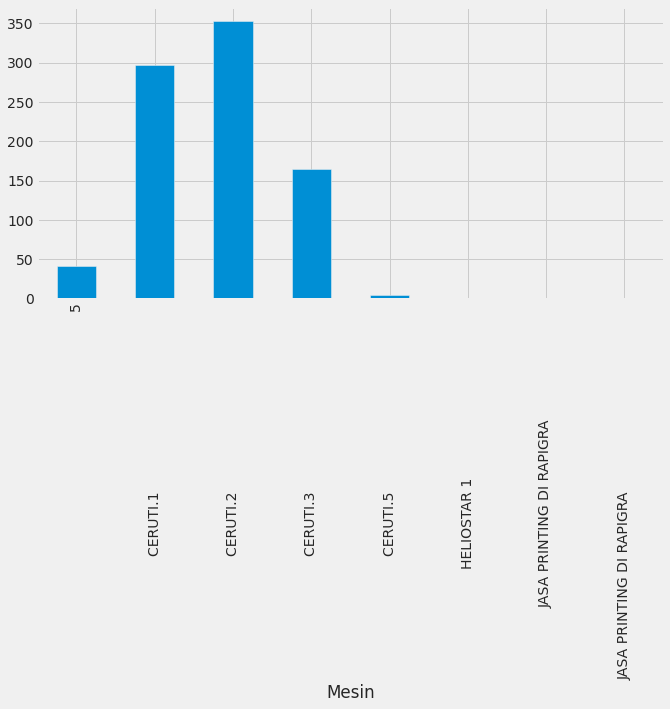

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
cat_df.groupby(['Mesin']).NoJI.count().plot.bar(ylim=0)
plt.show()

In [38]:
fn_df.describe().T

,count,unique,top,freq
NoJI,865,865,5587 1B,1
Mesin,865,8,CERUTI.2 ...,353
Tanggal SUP,865,111,7/8/2021,83


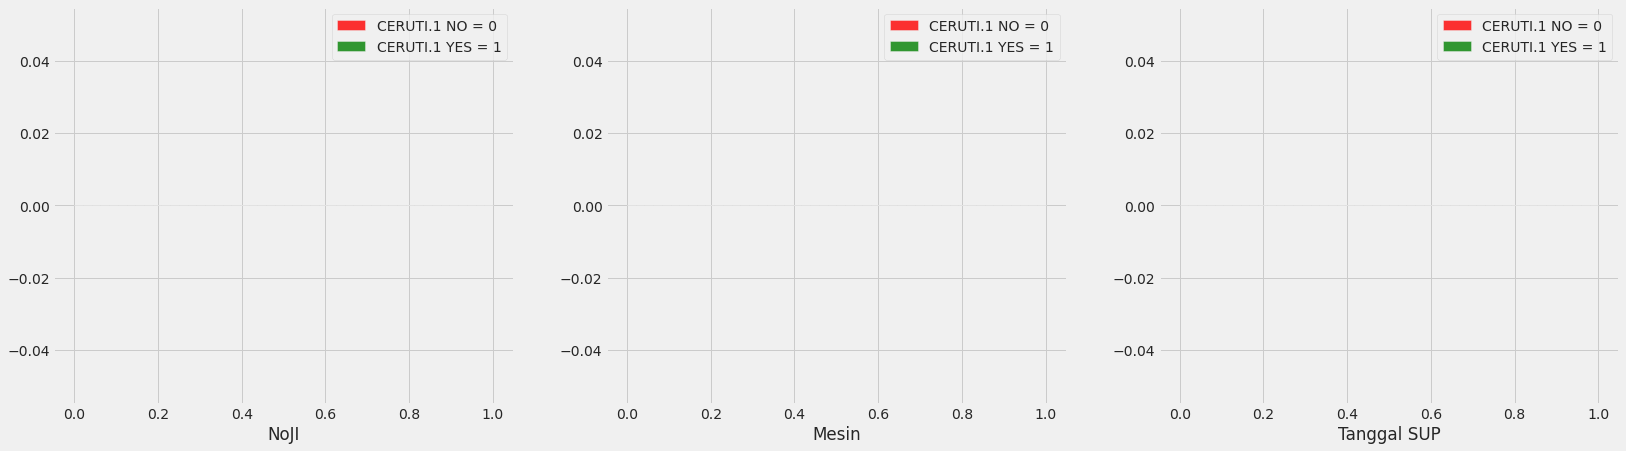

In [50]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(cat_df, 1):
    plt.subplot(2, 3, i)
    fn_df[fn_df["Mesin"] == 0][column].hist(bins=48, color='r', label='CERUTI.1 NO = 0', alpha=0.8)
    fn_df[fn_df["Mesin"] == 1][column].hist(bins=48, color='g', label='CERUTI.1 YES = 1', alpha=0.8)
    plt.legend()
    plt.xlabel(column)

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
cat_df.groupby(['Employee_type','maried_status']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

KeyError: ignored

<Figure size 1080x360 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
cat_df.groupby(['job_level','maried_status']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

KeyError: ignored

<Figure size 1080x360 with 0 Axes>

In [21]:
from io import StringIO
fcol = ['NoJI',
       'Mesin',
       'Tanggal_SUP']
flo_df = fn_df[fcol]
flo_df = flo_df[pd.notnull(fn_df['NoJI'])].astype('int64')
flo_df.columns = ['NoJI',
       'Mesin',
       'Tanggal_SUP']
flo_df.head()

KeyError: ignored